In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

##Normalize pixels

In [5]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

##one-hot encoding

In [6]:
print("Original train_labels shape:", train_labels.shape)
print("Original test_labels shape:", test_labels.shape)

train_labels = to_categorical(train_labels.flatten(), 10)
test_labels = to_categorical(test_labels.flatten(), 10)

print("One-hot encoded train_labels shape:", train_labels.shape)
print("One-hot encoded test_labels shape:", test_labels.shape)

Original train_labels shape: (50000, 1)
Original test_labels shape: (10000, 1)
One-hot encoded train_labels shape: (50000, 10)
One-hot encoded test_labels shape: (10000, 10)


##Data Visualization

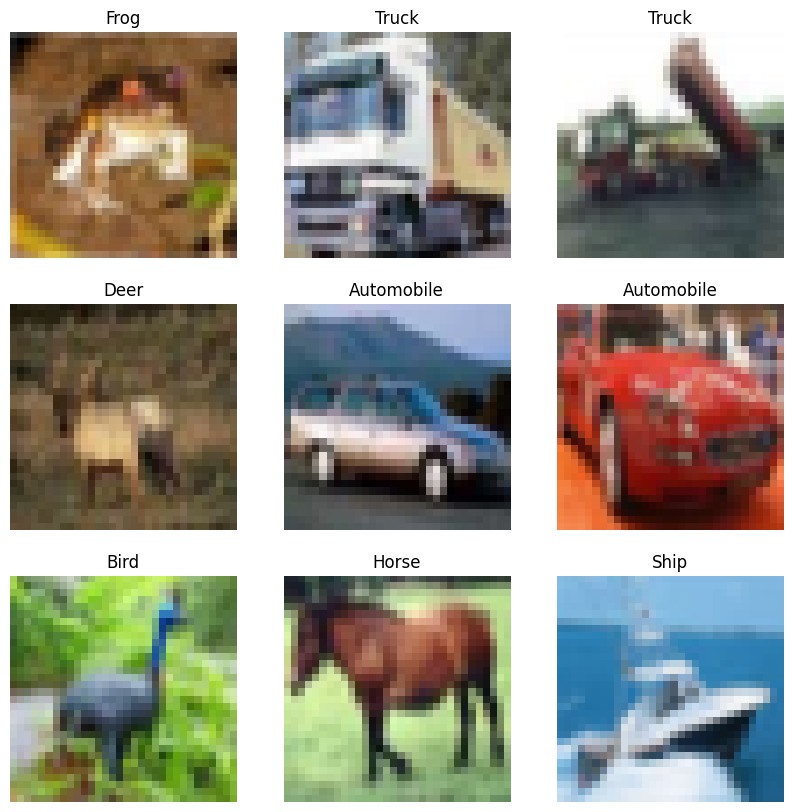

In [7]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(train_images[i])
  plt.title(class_names[np.argmax(train_labels[i])])
  plt.axis('off')
plt.show()

In [8]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


##CNN Model

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
fited = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 95s 149ms/step - accuracy: 0.3123 - loss: 1.8452 - val_accuracy: 0.5389 - val_loss: 1.3015
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 139s 143ms/step - accuracy: 0.5606 - loss: 1.2394 - val_accuracy: 0.6180 - val_loss: 1.0826
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 144ms/step - accuracy: 0.6360 - loss: 1.0312 - val_accuracy: 0.6647 - val_loss: 0.9688
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 142ms/step - accuracy: 0.6771 - loss: 0.9134 - val_accuracy: 0.6797 - val_loss: 0.9353
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 142ms/step - accuracy: 0.7128 - loss: 0.8251 - val_accuracy: 0.6916 - val_loss: 0.8877
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 152ms/step - accuracy: 0.7392 - loss: 0.7429 - val_accuracy: 0.7040 - val_loss: 0.8610
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 141ms/step - accuracy: 0.7549 - loss: 0.6925 - val_accuracy: 0.7137 - val_loss: 0.8284
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 143ms/step - accuracy: 0.7841 - 

In [17]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7082 - loss: 0.8920
Test accuracy: 0.7101
Test loss: 0.8857


##Visualize Training VS Validation Performance

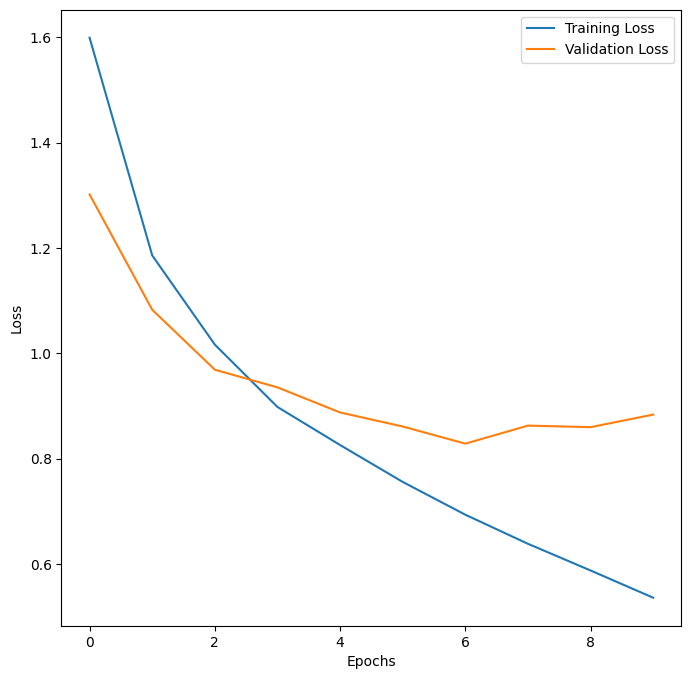

In [18]:
plt.figure(figsize=(8,8))
plt.plot(fited.history["loss"],label = "Training Loss")
plt.plot(fited.history["val_loss"],label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

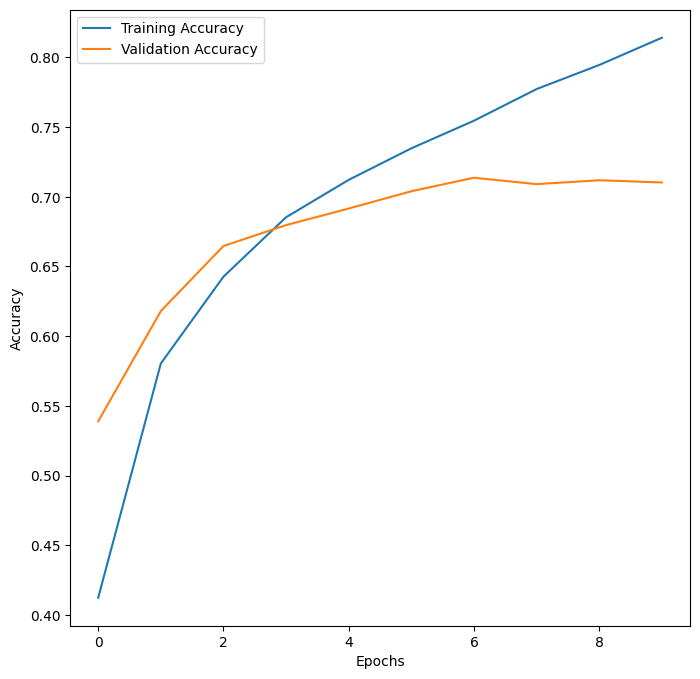

In [19]:
plt.figure(figsize=(8,8))
plt.plot(fited.history["accuracy"],label = "Training Accuracy")
plt.plot(fited.history["val_accuracy"],label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##Testing in action

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image 1: Incorrect prediction - True: Truck, Predicted: Automobile
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image 2: Correct prediction - Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image 3: Correct prediction - Horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Image 4: Correct prediction - Ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image 5: Correct prediction - Airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Image 6: Incorrect prediction - True: Truck, Predicted: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Image 7: Correct prediction - Automobile
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image 8: Correct prediction - Truck
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image 9: Correct prediction - Airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image 10: Incorrect prediction - True: Automobile, Predicted: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Image 11: Correct prediction - Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image 12: Correct prediction - Deer
1/1 ━━━━━━━━━━━━━━━━

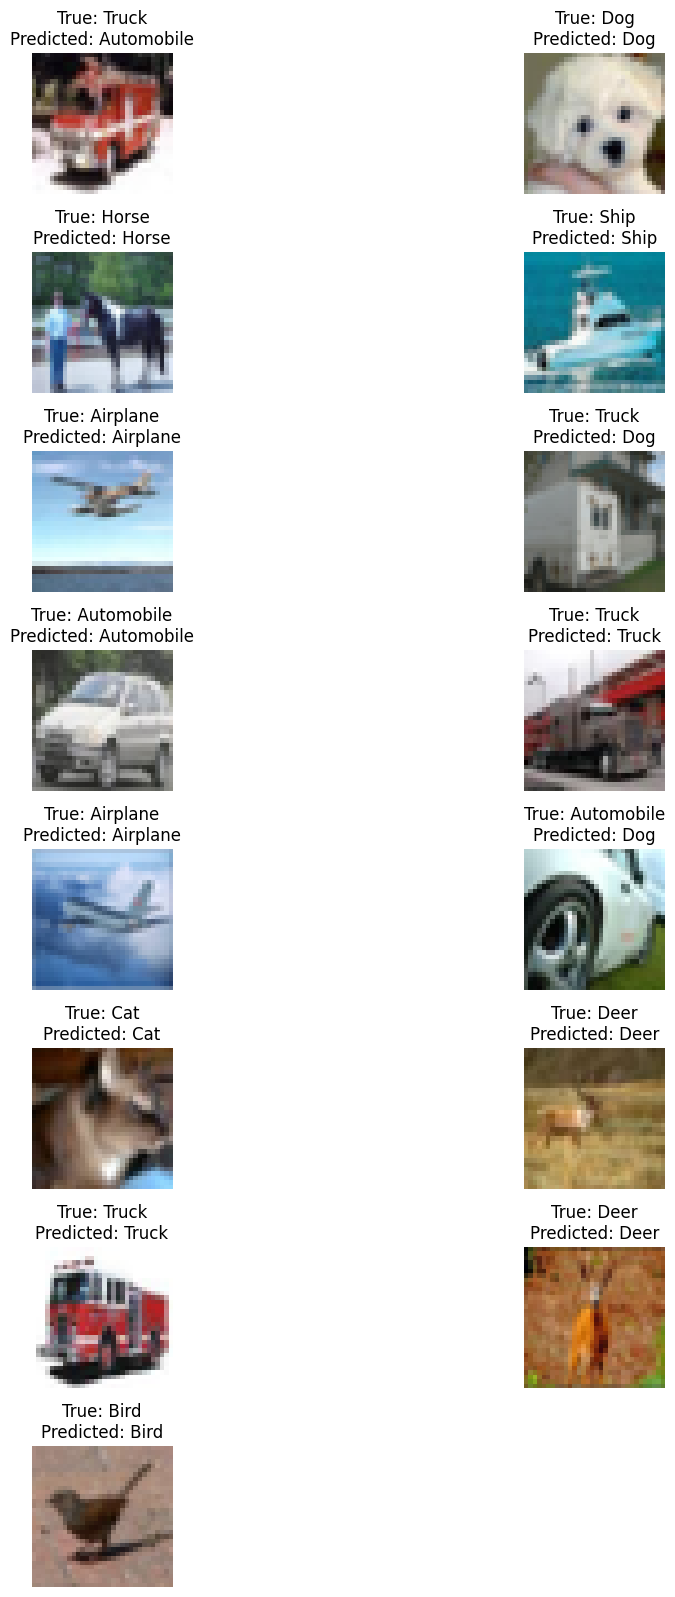


Accuracy for the selected 15 samples: 80.00%


In [47]:
import random

num_samples = 15
indices = random.sample(range(len(test_images)), num_samples)
correct_predictions = 0

plt.figure(figsize=(10, num_samples * 2))

for i, idx in enumerate(indices):
    img = test_images[idx]
    true_label = np.argmax(test_labels[idx])  # True label from the test set
    predicted_label = np.argmax(model.predict(np.expand_dims(img, axis=0)))  # Model's prediction

    plt.subplot(num_samples, 2, i + 1)
    plt.imshow(img)
    plt.title(f"True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}")
    plt.axis('off')

    if true_label == predicted_label:
        print(f"Image {i + 1}: Correct prediction - {class_names[predicted_label]}")
        correct_predictions += 1
    else:
        print(f"Image {i + 1}: Incorrect prediction - True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")

plt.tight_layout()
plt.show()

accuracy = correct_predictions / num_samples
print(f"\nAccuracy for the selected {num_samples} samples: {accuracy * 100:.2f}%")
